Primero importamos las librerías que vamos a necesitar para nuestro modelo de regresión logística

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import statsmodels.api as sm

Ahora introducimos la ruta en la que guardamos el archivo con los datos que se analizarán y tambíen aprovechamos para ahcer un pequeño ajuste en la visualización del dataframe.

In [112]:
train = pd.read_csv('/home/luis-loreto/Documentos/Python/Titanic/Tablas/train.csv')
test = pd.read_csv('/home/luis-loreto/Documentos/Python/Titanic/Tablas/test.csv')
pd.options.display.max_columns = None
pd.options.display.max_rows = None

Iniciamos con el análisis exploratorio. Vemos cuántos registros tiene cada variable. Se puede observar que son 11 variables independientes y una dependiente: Survived. Ésta última será la variable para el aprendizaje en nuestro modelos de machine learning. 

In [113]:
train.count().reset_index(name="Total")

,index,Total
0,PassengerId,891
1,Survived,891
2,Pclass,891
3,Name,891
4,Sex,891
5,Age,714
6,SibSp,891
7,Parch,891
8,Ticket,891
9,Fare,891


Ahora vemos si hay missings en nuestro dataframe

In [119]:
missing_values_count = train.isnull().sum()
print(missing_values_count)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


Vemos que las variables con missings son: Age, Cabin y Embarked. Debemos decidir si vamos a utilizar dichas variables y en su caso qué método de imputación elegir. Por el momento, descartaremos la variable Cabin, pues sus missings representan más de la mitad de las observaciones del dataframe. Usaremos algún método de imputación en las variables Age y Embarked para poder incluirlas en el modelo.

Ahora iniciaremos con la imputación para las variables Age y Embarked.

In [116]:
def hotdeck_age(x):
    for column in train.columns:
        # Encontrar índices donde hay valores faltantes
        missing_indices = x[x["Age"].isnull()].index
        
        for idx in missing_indices:
            # Seleccionar filas no faltantes
            non_missing_values = x["Age"].dropna()
            # Elegir un valor aleatorio de las filas no faltantes
            random_value = non_missing_values.sample(n=1).values[0]
            # Imputar el valor aleatorio en el índice correspondiente
            x.at[idx, "Age"] = random_value
            
    return x

In [59]:
def hotdeck_embarked(x):
    for column in x.columns:
        # Encontrar índices donde hay valores faltantes
        missing_indices = x[x["Embarked"].isnull()].index
        
        for idx in missing_indices:
            # Seleccionar filas no faltantes
            non_missing_values = x["Embarked"].dropna()
            # Elegir un valor aleatorio de las filas no faltantes
            random_value = non_missing_values.sample(n=1).values[0]
            # Imputar el valor aleatorio en el índice correspondiente
            x.at[idx, "Embarked"] = random_value
            
    return train

In [117]:
def hotdeck_fare(x):
    for column in x.columns:
        # Encontrar índices donde hay valores faltantes
        missing_indices = x[x["Fare"].isnull()].index
        
        for idx in missing_indices:
            # Seleccionar filas no faltantes
            non_missing_values = x["Fare"].dropna()
            # Elegir un valor aleatorio de las filas no faltantes
            random_value = non_missing_values.sample(n=1).values[0]
            # Imputar el valor aleatorio en el índice correspondiente
            x.at[idx, "Fare"] = random_value
            
    return test

Ahora aplicamos la función a nuestro dataframe

In [118]:
train = hotdeck_age(train)
train = hotdeck_embarked(train)

Podemos visualizar la forma resultante de la variable con la imputación realizada

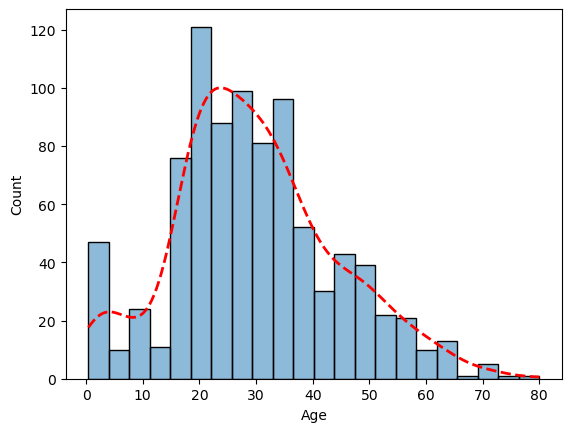

In [120]:
sns.histplot(x = train['Age'], kde = True, line_kws = {'linestyle' : 'dashed', 
                                                 'linewidth' : '2'}).lines[0].set_color('red')

Vamos a crear variables dummies

In [124]:
train = pd.get_dummies(train, columns = ['Sex', 'Pclass', 'Embarked'], drop_first=True, dtype=float)

In [126]:
train.head(3)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Ticket2,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,2,1.0,0.0,1.0,0.0,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0.0,0.0,0.0,0.0,0.0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,3,0.0,0.0,1.0,0.0,1.0


In [127]:
X_train = train[["Age", "SibSp", "Parch", "Fare", "Sex_male", "Pclass_2", "Pclass_3", "Embarked_Q", "Embarked_S"]]
y_train = train[["Survived"]]

In [128]:
model = LogisticRegression()

In [129]:
model.fit(X_train, y_train)

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [131]:
model.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Ticket2


Ahora vamos a usar nuestro modelo en el conjunto test

In [134]:
missing_values_count = test.isnull().sum()
print(missing_values_count)

PassengerId      0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Ticket2          0
Sex_male         0
Pclass_2         0
Pclass_3         0
Embarked_Q       0
Embarked_S       0
dtype: int64


In [133]:
test = hotdeck_age(test)
test = hotdeck_fare(test)
test['Ticket2'] = test['Ticket'].apply(primer_caracter_despues_de_eliminar)
test['Ticket2'] = test['Ticket2'].apply(lambda x: '1' if x.startswith(('B', 'L'))
                                   else x)

test.groupby(["Ticket2"])["Ticket2"].count().reset_index(name="Cantidad")
test["Ticket2"] = test["Ticket2"].astype(int)

test = pd.get_dummies(test, columns = ['Sex', 'Pclass', 'Embarked'], drop_first=True, dtype=float)

In [145]:
X_test = test[["Age", "SibSp", "Parch", "Fare", "Sex_male", "Pclass_2", "Pclass_3", "Embarked_Q", "Embarked_S"]]

In [146]:
X_test

,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,34.50,0,0,7.8292,1.0,0.0,1.0,1.0,0.0
1,47.00,1,0,7.0000,0.0,0.0,1.0,0.0,1.0
2,62.00,0,0,9.6875,1.0,1.0,0.0,1.0,0.0
3,27.00,0,0,8.6625,1.0,0.0,1.0,0.0,1.0
4,22.00,1,1,12.2875,0.0,0.0,1.0,0.0,1.0
5,14.00,0,0,9.2250,1.0,0.0,1.0,0.0,1.0
6,30.00,0,0,7.6292,0.0,0.0,1.0,1.0,0.0
7,26.00,1,1,29.0000,1.0,1.0,0.0,0.0,1.0
8,18.00,0,0,7.2292,0.0,0.0,1.0,0.0,0.0
9,21.00,2,0,24.1500,1.0,0.0,1.0,0.0,1.0


In [158]:
y_test = model.predict(X_test)

In [ ]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

In [159]:
y_test = pd.DataFrame(y_test)

In [163]:
y_test.rename(columns={0: 'Survived'}, inplace=True)

In [ ]:
y_test

In [165]:
y_test = pd.concat([test["PassengerId"], y_test], axis=1)

In [166]:
y_test["PassengerId"] = y_test["PassengerId"].astype(int)

In [167]:
y_test.to_csv('resultados.csv', index=False)